In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from api_keys import api_key

In [18]:
base_url = "https://api.usa.gov/crime/fbi/sapi/api/"

In [19]:
# NATIONAL LEVEL summary-controller

# Setting variable for offense so that you can easily have the URL filter by specific offense type
nat_since = "2009"
nat_until = "2019"

# This field can be age, count, ethnicity, race, sex
#nat_variable = "age"
# https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2000/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

# Building query URL
nat_query_url = f"{base_url}estimates/national/{nat_since}/{nat_until}?API_KEY={api_key}"
nat_query_url

'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2009/2019?API_KEY=cflHyG9x1XDXBgcVSb4tVrfvlJ40CZESdtJRqOVe'

In [20]:
# Getting data
nat_fbi_response = requests.get(nat_query_url)
nat_fbi_json = nat_fbi_response.json()
nat_fbi_json

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 764057,
   'property_crime': 8024115,
   'burglary': 1587564,
   'larceny': 5723488,
   'motor_vehicle_theft': 713063,
   'arson': 44059},
  {'state_id': None,
   'state_abbr': '',
   'year': 2009,
   'population': 307006550,
   'violent_crime': 1325896,
   'homicide': 15399,
   'rape_legacy': 89241,
   'rape_revised': None,
   'robbery': 408742,
   'aggravated_assault': 812514,
   'property_crime': 9337060,
   'burglary': 2203313,
   'larceny': 6338095,
   'motor_vehicle_theft': 795652,
   'arson': 59866},
  {'state_id': None,
   'state_abbr': '',
   'year': 2010,
   'population': 309330219,
   'violent_crime': 1251248,
   'homicide': 14722,
   'rape_legacy': 85593,
   'rape_revised': None,
   'robbery': 369089,
   'aggravated_assault': 7818

In [21]:
# Testing if keys are correct to grab the specific data
print(nat_fbi_json["results"][0]["year"])

2015


In [22]:
# Creating lists to then later append with data from JSON data
nat_year = []
nat_population = []
nat_agg_assault = []
nat_arson = []
nat_burglary = []
nat_homicide = []
nat_larceny = []
nat_motor_theft = []
nat_prop_crime = []
nat_rape_legacy = []
nat_rape_revised = []
nat_robbery = []
nat_violent_crime = []
nat_num = 0

for x in nat_fbi_json["results"]:
    nat_year.append(nat_fbi_json["results"][nat_num]["year"])
    nat_population.append(nat_fbi_json["results"][nat_num]["population"])
    nat_agg_assault.append(nat_fbi_json["results"][nat_num]["aggravated_assault"])
    nat_arson.append(nat_fbi_json["results"][nat_num]["arson"])
    nat_burglary.append(nat_fbi_json["results"][nat_num]["burglary"])
    nat_homicide.append(nat_fbi_json["results"][nat_num]["homicide"])
    nat_larceny.append(nat_fbi_json["results"][nat_num]["larceny"])
    nat_motor_theft.append(nat_fbi_json["results"][nat_num]["motor_vehicle_theft"])
    nat_prop_crime.append(nat_fbi_json["results"][nat_num]["property_crime"])
    nat_rape_legacy.append(nat_fbi_json["results"][nat_num]["rape_legacy"])
    nat_rape_revised.append(nat_fbi_json["results"][nat_num]["rape_revised"])
    nat_robbery.append(nat_fbi_json["results"][nat_num]["robbery"])
    nat_violent_crime.append(nat_fbi_json["results"][nat_num]["violent_crime"])
    nat_num +=1

In [23]:
# Create a dictionary to hold the keys(titles) and lists
nat_fbi_dict = {
    "Data Year": nat_year,
    "Population": nat_population,
    "National Aggravated Assault": nat_agg_assault,
    "National Arson": nat_arson,
    "National Burglary": nat_burglary,
    "National Homicide": nat_homicide,
    "National Larceny": nat_larceny,
    "National Motor Vehicle Theft": nat_motor_theft,
    "National Property Crime": nat_prop_crime,
    "National Rape Legacy": nat_rape_legacy,
    "National Rape Revised": nat_rape_revised,
    "National Robbery":  nat_robbery,
    "National Violent Crime": nat_violent_crime
}

nat_fbi_df = pd.DataFrame(nat_fbi_dict)
nat_fbi_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
0,2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
1,2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896
2,2010,309330219,781844,55994,2168459,14722,6204601,739565,9112625,85593.0,NaN,369089,1251248
3,2011,311587816,752423,54555,2185140,14661,6151095,716508,9052743,84175.0,NaN,354772,1206031
4,2017,325147121,810319,42972,1397045,17294,5513000,772943,7682988,NaN,135666.0,320596,1283875
5,2012,313873685,762009,55368,2109932,14856,6168874,723186,9001992,85141.0,NaN,355051,1217057
6,2013,316497531,726777,47229,1932139,14319,6019465,700288,8651892,82109.0,113695.0,345093,1168298
7,2014,318907401,731089,46241,1713153,14164,5809054,686803,8209010,84864.0,118027.0,322905,1153022
8,2016,323405935,802982,45828,1516405,17413,5644835,767290,7928530,96970.0,132414.0,332797,1285606
9,2018,326687501,810982,39305,1235013,16374,5232167,751904,7219084,NaN,143765.0,281278,1252399


In [24]:
# Sorting new data frame by year
nat_sorted_df = nat_fbi_df.sort_values(by=["Data Year"])
nat_sorted_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
1,2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896
2,2010,309330219,781844,55994,2168459,14722,6204601,739565,9112625,85593.0,NaN,369089,1251248
3,2011,311587816,752423,54555,2185140,14661,6151095,716508,9052743,84175.0,NaN,354772,1206031
5,2012,313873685,762009,55368,2109932,14856,6168874,723186,9001992,85141.0,NaN,355051,1217057
6,2013,316497531,726777,47229,1932139,14319,6019465,700288,8651892,82109.0,113695.0,345093,1168298
7,2014,318907401,731089,46241,1713153,14164,5809054,686803,8209010,84864.0,118027.0,322905,1153022
0,2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
8,2016,323405935,802982,45828,1516405,17413,5644835,767290,7928530,96970.0,132414.0,332797,1285606
4,2017,325147121,810319,42972,1397045,17294,5513000,772943,7682988,NaN,135666.0,320596,1283875
9,2018,326687501,810982,39305,1235013,16374,5232167,751904,7219084,NaN,143765.0,281278,1252399


In [25]:
# Creating a new data frame to use when searching for specific info for graphing
year_search_df = nat_sorted_df.set_index("Data Year")
year_search_df

,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
Data Year,,,,,,,,,,,,
2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896
2010,309330219,781844,55994,2168459,14722,6204601,739565,9112625,85593.0,NaN,369089,1251248
2011,311587816,752423,54555,2185140,14661,6151095,716508,9052743,84175.0,NaN,354772,1206031
2012,313873685,762009,55368,2109932,14856,6168874,723186,9001992,85141.0,NaN,355051,1217057
2013,316497531,726777,47229,1932139,14319,6019465,700288,8651892,82109.0,113695.0,345093,1168298
2014,318907401,731089,46241,1713153,14164,5809054,686803,8209010,84864.0,118027.0,322905,1153022
2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
2016,323405935,802982,45828,1516405,17413,5644835,767290,7928530,96970.0,132414.0,332797,1285606
2017,325147121,810319,42972,1397045,17294,5513000,772943,7682988,NaN,135666.0,320596,1283875


In [26]:
# Turning column into a list off the already sorted data frame
sorted_list = year_search_df["National Aggravated Assault"].tolist()
sorted_list

[812514,
 781844,
 752423,
 762009,
 726777,
 731089,
 764057,
 802982,
 810319,
 810982,
 821182]

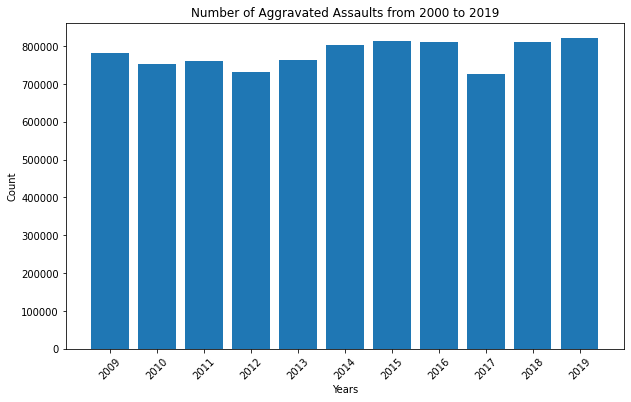

In [27]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(nat_year, sorted_list)
plt.xticks(nat_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2000 to 2019")
plt.show()

In [28]:
national_avg = []
for x in sorted_list:
    national_avg.append(x/50)

In [29]:
national_avg

[16250.28,
 15636.88,
 15048.46,
 15240.18,
 14535.54,
 14621.78,
 15281.14,
 16059.64,
 16206.38,
 16219.64,
 16423.64]

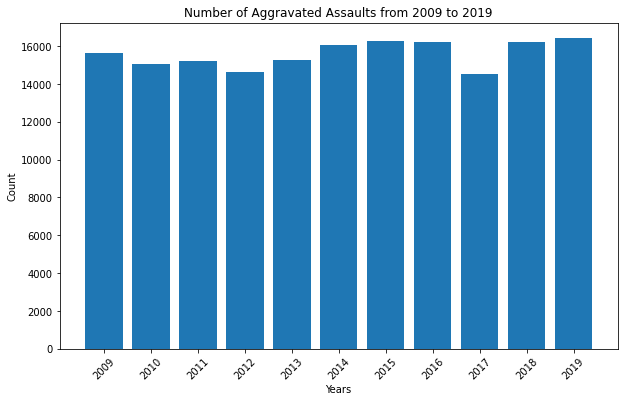

In [30]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(nat_year, national_avg)
plt.xticks(nat_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2009 to 2019")
plt.show()